# 机器学习中的Kernal是什么

比喻：Kernel功能很像光学实验中的三棱镜，三棱镜将白光中的多彩光谱解析出来了；而Kernel是会把数据中隐藏的信息解析出来，映射到高维空间中去。

## SVM中的应用

SVM（Support Vector Machine）向量机是一个分类算法，核心思想是在特征空间中找到一个最优的超平面，使得不同类别的数据在该超平面两侧，并尽可能地远离这个超平面，以此实现分类。

以SVM举例，我们分别使用了线性SVN和带RBF（Radial Basis Function）核的SVF，容易看出Kernal是带RBF的略好一些，因为在线性空间不容易处理的问题，在高维空间可能就存在一个很方便的解。

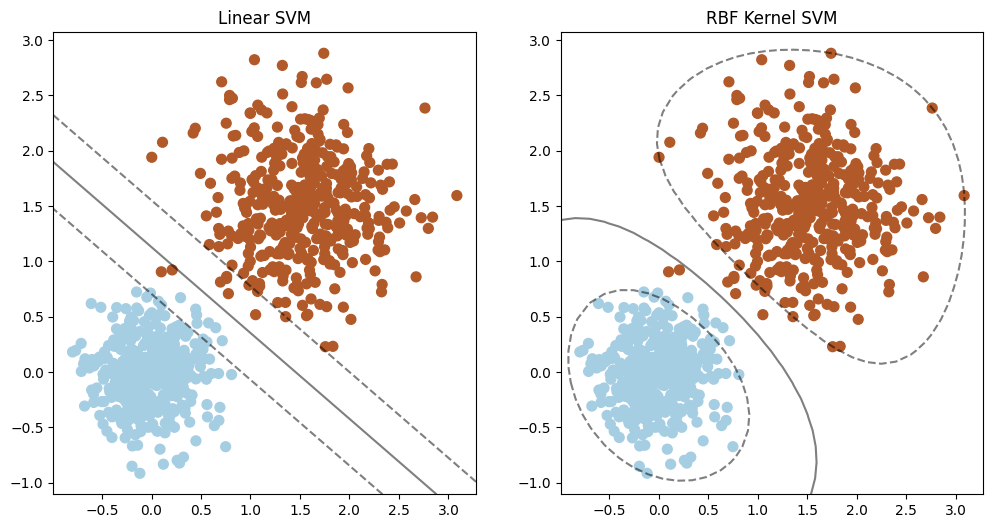

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# 创建一个同心圆的数据集
def create_concentric_circles(n_samples=100):
    np.random.seed(0)
    X_inner = np.random.randn(n_samples//2, 2) * 0.3
    X_outer = np.random.randn(n_samples//2, 2) * 0.5 + 1.5
    X = np.vstack((X_inner, X_outer))
    y = np.array([0] * (n_samples//2) + [1] * (n_samples//2))
    return X, y

# 生成数据
X, y = create_concentric_circles(800)

# 训练线性SVM
linear_svm = svm.SVC(kernel='linear').fit(X, y)

# 训练带有RBF核的SVM
rbf_svm = svm.SVC(kernel='rbf', gamma='auto').fit(X, y)

# 绘制数据点和决策边界
def plot_decision_boundary(classifier, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 创建网格来评估模型
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = classifier.decision_function(xy).reshape(XX.shape)

    # 绘制决策边界和边界
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.set_title(title)

# 绘图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_decision_boundary(linear_svm, X, y, 'Linear SVM')

plt.subplot(1, 2, 2)
plot_decision_boundary(rbf_svm, X, y, 'RBF Kernel SVM')

plt.show()

## PCA 算法中的 Kernel 应用

作为前机器学习时代的主力算法，PCA是大家所熟知的。

下面例子中，一个三维空间的数据是很难做分类的，但是靠一个rbf核(`kernel="rbf"`)降维到二维空间，则感觉能够更好的做区分

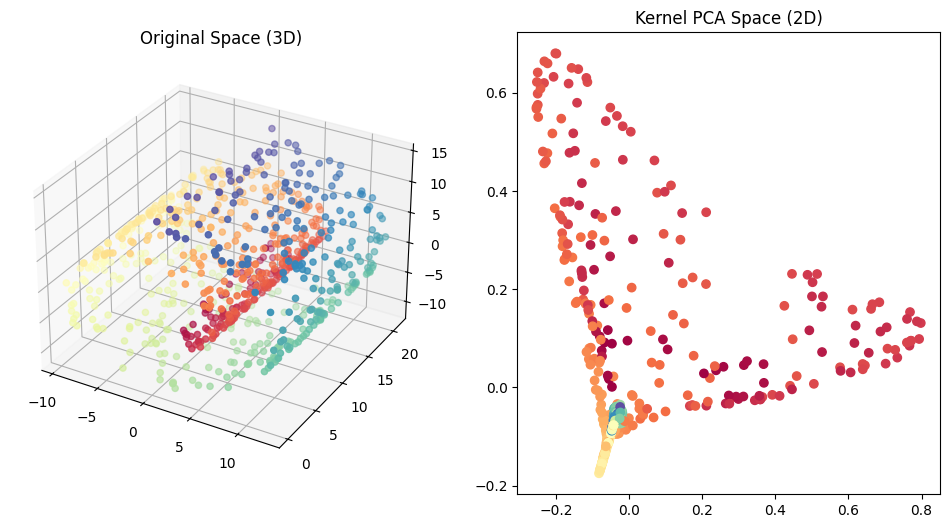

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# 生成三维非线性数据：瑞士卷数据集
X, color = make_swiss_roll(n_samples=800, noise=0.05)

# 使用核PCA将数据集投影到二维平面上
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=0.1)
X_kpca = kpca.fit_transform(X)

# 可视化结果
fig = plt.figure(figsize=(12, 6))

# 原始三维数据
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.set_title("Original Space (3D)")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

# 核PCA变化后的二维数据
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Kernel PCA Space (2D)")
ax2.scatter(X_kpca[:, 0], X_kpca[:, 1], c=color, cmap=plt.cm.Spectral)

plt.show()

## CNN领域的Kernel

Kernel是一个标准的操作，把原始数据映射到不同的数据空间，类似于一个Filter的概念，它会分别提取边缘、纹理等特征，再做了最后的判断。

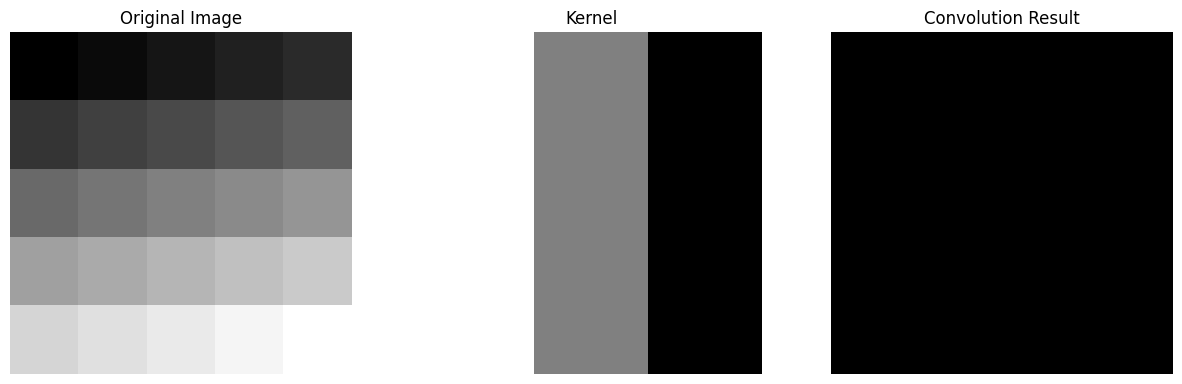

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 创建一个简单的示例图像
image = np.array([[1, 2, 3, 4, 5],
                  [6, 7, 8, 9, 10],
                  [11, 12, 13, 14, 15],
                  [16, 17, 18, 19, 20],
                  [21, 22, 23, 24, 25]])

# 创建一个简单的卷积核
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# 使用2D卷积(padding = 0, stride = 1)
output = signal.convolve2d(image, kernel, mode='valid')

# 可视化原始图像、卷积核和卷积结果
fig, axarr = plt.subplots(1, 3, figsize=(15, 5))

axarr[0].imshow(image, cmap='gray')
axarr[0].set_title('Original Image')
axarr[0].set_axis_off()

axarr[1].imshow(kernel, cmap='gray')
axarr[1].set_title('Kernel')
axarr[1].set_axis_off()

axarr[2].imshow(output, cmap='gray')
axarr[2].set_title('Convolution Result')
axarr[2].set_axis_off()

plt.show()